### Topic Modeling the Whole Corpus

In [1]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from scipy.sparse import csr_matrix

def display_topics(file_path, num_top_words, feature_names):
    # Step 1: Load TF-IDF vectors
    tfidf_vectors = pd.read_csv(file_path)
    tfidf_matrix = csr_matrix(tfidf_vectors.values)

    num_topics = 12
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(tfidf_matrix)

    for topic_idx, topic in enumerate(lda_model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

# Example usage
file_path = 'vectorized_tfidf_500.csv'
num_top_words = 20
feature_names = pd.read_csv(file_path).columns
display_topics(file_path, num_top_words, feature_names)


Topic 0:
buffett berkshire lasso chandrasekaran newton dealer anadol yawanawa greedflation mishuris dealership horwitz rainforest chevrolet sinsky chevy langone cooper chandra ny
Topic 1:
francis chang guardian freelancer pope trafficking liv pe fec subramanian murray vandehei pga kabatznik narrated trillium peds realtor doctoral trending
Topic 2:
fm arr pocket devin column danger dasgupta mongodb capillary bender pouring ashley hoping dumb narrator radiology zomato alison bulletin renewable
Topic 3:
genz nasscom myntra clock lilly lamar phishing doomsday flag vincent dhenu bulletin conitzer red dana thorn attack willner midnight email
Topic 4:
repair icahn drummond galaxy cosson alison yohana hindenburg madonna wired marche illumina epstein theater katie dividend editorial narrator mad pi
Topic 5:
ai openai model company google image india startup data product chatgpt technology language video meta new human text chatbots system
Topic 6:
company ai technology new year apple people tim

5. Assigning Categories to the Topics
- This step we have to do manually by named each topics based on its key words

In [3]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from scipy.sparse import csr_matrix

def display_topics_with_categories(model, feature_names, num_top_words, topic_categories):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d: %s" % (topic_idx, topic_categories.get(topic_idx, "Undefined")))
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print("Top Words:", ", ".join(top_words))
        print()

# Define categories for each topic
topic_categories = {
    0: "Technology and Innovation",
    1: "Politics and Security",
    2: "Legal and Regulatory Compliance",
    3: "Cruptocurrency and Blockchain Technology",
    4: "Communication and Collaboration Tools",
    5: "Financial Markets and Investment Strategies",
    6: "Corporate Ventures and Partnerships",
    7: "Healthcare and Medical Practices",
    8: "AI. and Technology Companies",
    9: "Corporate Governance and Compliance Issues",
    10: "Social Impact and Ethical Considerations",
    11: "Technology Research and Development",
   
}

# Example usage: Assuming you have already defined and fitted the LDA model
num_topics = 12  # Assuming you have 12 topics
feature_names = pd.read_csv('vectorized_tfidf_500.csv').columns
num_top_words = 30  # Assuming you want to display 30 top words per topic
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(csr_matrix(pd.read_csv('vectorized_tfidf_500.csv').values))
display_topics_with_categories(lda_model, feature_names, num_top_words, topic_categories)


Topic 0: Technology and Innovation
Top Words: buffett, berkshire, lasso, chandrasekaran, newton, dealer, anadol, yawanawa, greedflation, mishuris, dealership, horwitz, rainforest, chevrolet, sinsky, chevy, langone, cooper, chandra, ny, gdp, romero, midnight, devin, greater, preference, ford, edition, skydance, recall

Topic 1: Politics and Security
Top Words: francis, chang, guardian, freelancer, pope, trafficking, liv, pe, fec, subramanian, murray, vandehei, pga, kabatznik, narrated, trillium, peds, realtor, doctoral, trending, moines, fighter, ren, wood, dividend, adaptable, irish, gop, mad, liu

Topic 2: Legal and Regulatory Compliance
Top Words: fm, arr, pocket, devin, column, danger, dasgupta, mongodb, capillary, bender, pouring, ashley, hoping, dumb, narrator, radiology, zomato, alison, bulletin, renewable, april, cognition, letter, obsolescence, chunk, proven, listener, registered, strengthen, transaction

Topic 3: Cruptocurrency and Blockchain Technology
Top Words: genz, nassco

6. Assigning Topics to Documents

In [4]:
# Obtain document-topic distribution matrix
document_topic_distribution = lda_model.transform(csr_matrix(pd.read_csv('vectorized_tfidf_500.csv').values))

document_topics = []
for i, document in enumerate(document_topic_distribution):
    dominant_topic = document.argmax()  # Identify dominant topic
    topic_label = topic_categories.get(dominant_topic, "Undefined")  # Assign topic label
    document_topics.append({"document_id": i, "topic": topic_label})
    
# Print document-topic assignment
for doc_topic in document_topics:
    print("Document ID:", doc_topic["document_id"], "- Topic:", doc_topic["topic"])


Document ID: 0 - Topic: Corporate Ventures and Partnerships
Document ID: 1 - Topic: Corporate Ventures and Partnerships
Document ID: 2 - Topic: Corporate Ventures and Partnerships
Document ID: 3 - Topic: Corporate Ventures and Partnerships
Document ID: 4 - Topic: Corporate Ventures and Partnerships
Document ID: 5 - Topic: Corporate Ventures and Partnerships
Document ID: 6 - Topic: Corporate Ventures and Partnerships
Document ID: 7 - Topic: Corporate Ventures and Partnerships
Document ID: 8 - Topic: Corporate Ventures and Partnerships
Document ID: 9 - Topic: Financial Markets and Investment Strategies
Document ID: 10 - Topic: Financial Markets and Investment Strategies
Document ID: 11 - Topic: Corporate Ventures and Partnerships
Document ID: 12 - Topic: Corporate Ventures and Partnerships
Document ID: 13 - Topic: Corporate Ventures and Partnerships
Document ID: 14 - Topic: Corporate Ventures and Partnerships
Document ID: 15 - Topic: Corporate Ventures and Partnerships
Document ID: 16 - 

7. Visualizing the LDA topics

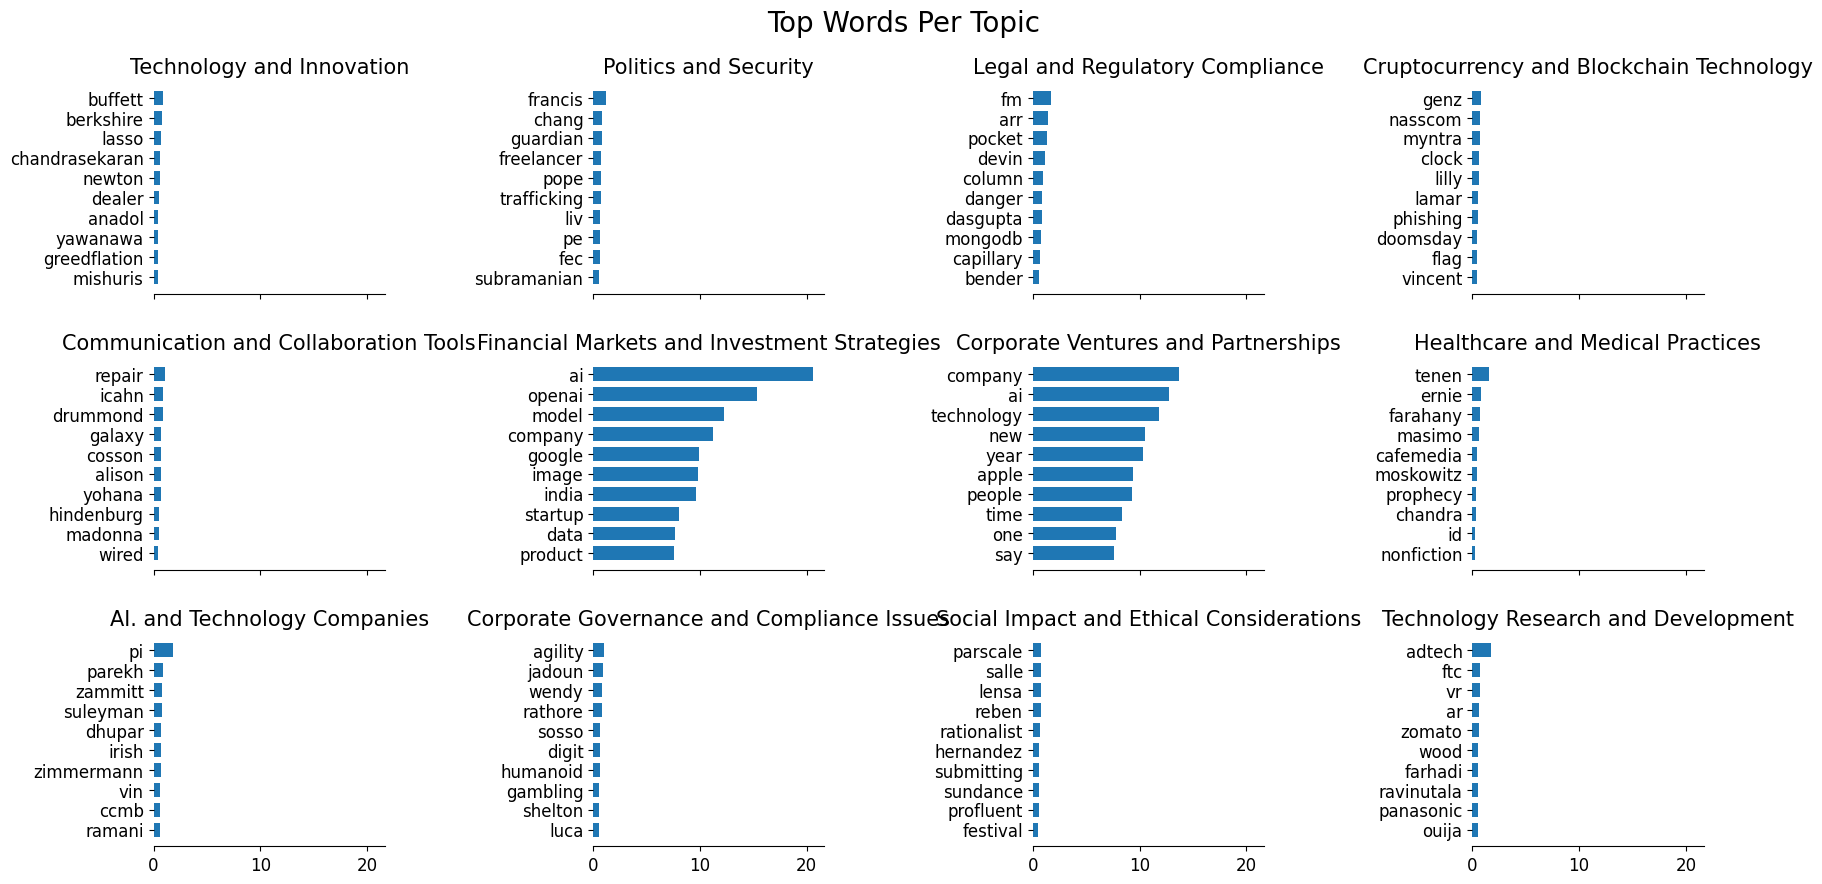

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np

# Define topic names
topic_names = [
    "Technology and Innovation",
    "Politics and Security",
    "Legal and Regulatory Compliance",
    "Cruptocurrency and Blockchain Technology",
    "Communication and Collaboration Tools",
    "Financial Markets and Investment Strategies",
    "Corporate Ventures and Partnerships",
    "Healthcare and Medical Practices",
    "AI. and Technology Companies",
    "Corporate Governance and Compliance Issues",
    "Social Impact and Ethical Considerations",
    "Technology Research and Development",
]

# Plot the top words for each topic
def plot_top_words(model, feature_names, n_top_words, title, topic_names=None):
    num_topics = len(model.components_)
    ncols = min(num_topics, 4)  # Maximum number of columns
    nrows = (num_topics // ncols) + (num_topics % ncols > 0)  # Calculate number of rows
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows), sharex=True)
    axes = axes.flatten()  # Flatten axes for easy iteration
    
    for topic_idx, topic in enumerate(model.components_):
        if topic_idx >= num_topics:  # Check if topic index exceeds the number of topics
            break  # Exit loop if all topics have been plotted
        
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        if topic_names is not None:
            ax.set_title(topic_names[topic_idx], fontsize=15)
        else:
            ax.set_title(f'Topic {topic_idx}', fontsize=15)
        ax.barh(top_features, weights, height=0.7)
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

    # Hide any extra subplots
    for i in range(num_topics, len(axes)):
        axes[i].axis('off')
        
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Example usage: Assuming you have already defined and fitted the LDA model
num_topics = 12  # Assuming you have 15 topics
feature_names = pd.read_csv('vectorized_tfidf_500.csv').columns
num_top_words = 10  # Assuming you want to display 10 top words per topic
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(csr_matrix(pd.read_csv('vectorized_tfidf_500.csv').values))
plot_top_words(lda_model, feature_names, n_top_words=num_top_words, title='Top Words Per Topic', topic_names=topic_names)


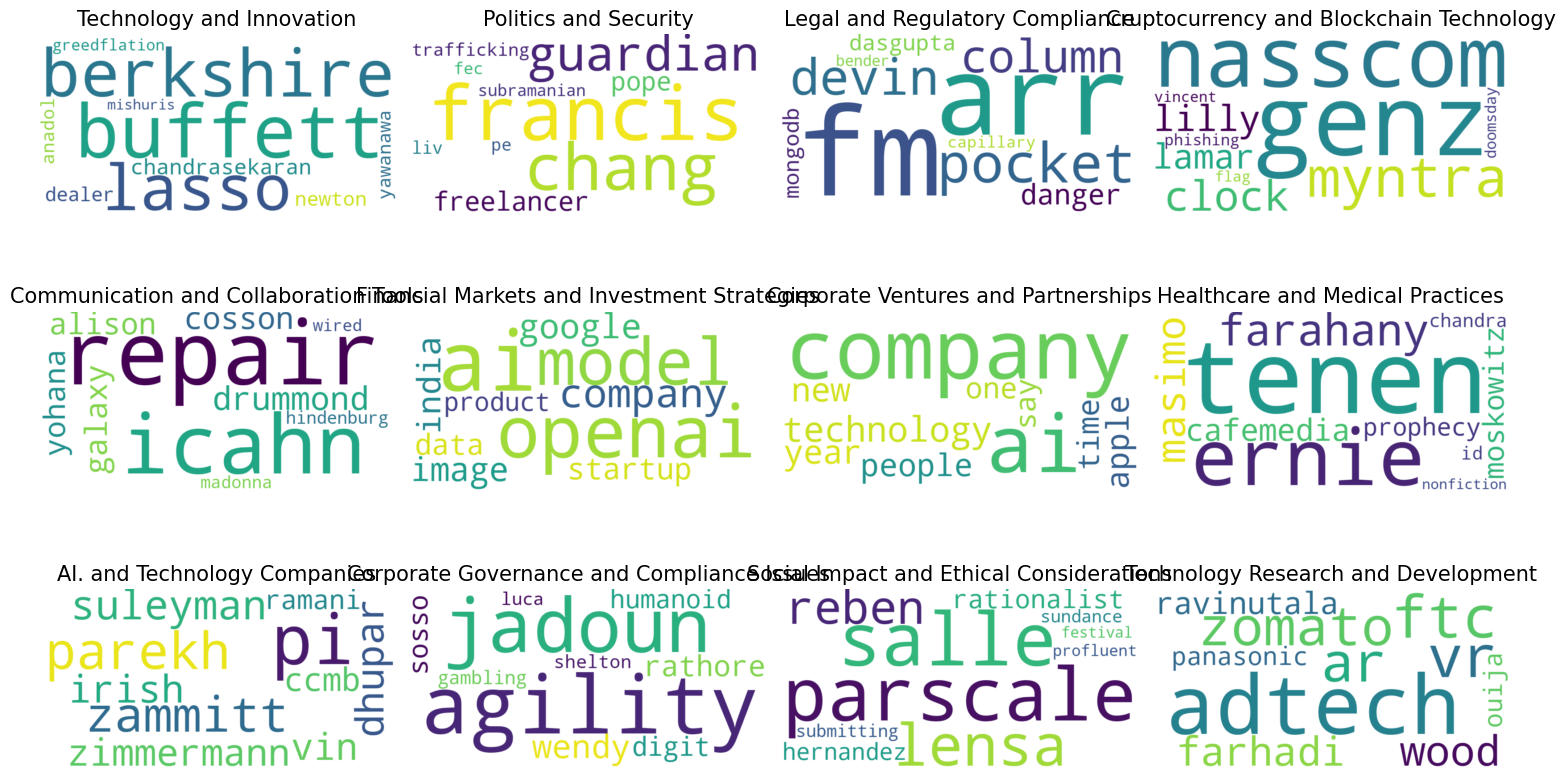

In [7]:
from wordcloud import WordCloud

# Create word clouds for each topic
def plot_word_clouds(model, feature_names, num_topics, n_top_words, topic_names=None):
    # Create subplots based on the number of topics
    ncols = min(num_topics, 4)  # Maximum number of columns
    nrows = (num_topics // ncols) + (num_topics % ncols > 0)  # Calculate number of rows
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows), sharex=True, sharey=True)
    axes = axes.flatten()  # Flatten the axes for easy iteration
    
    # Generate a word cloud for each topic
    for topic_idx, topic in enumerate(model.components_):
        # Get the top words and their weights for the current topic
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = {feature_names[i]: topic[i] for i in top_features_ind}
        
        # Generate a word cloud for the current topic
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_features)
        
        # Plot the word cloud
        ax = axes[topic_idx]
        if topic_names is not None:
            ax.set_title(topic_names[topic_idx], fontsize=15)
        else:
            ax.set_title(f'Topic {topic_idx}', fontsize=15)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
    
    # Hide any extra subplots
    for i in range(num_topics, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage: Assuming you have already defined and fitted the LDA model
num_topics = 12  # Assuming you have 15 topics
feature_names = pd.read_csv('vectorized_tfidf_500.csv').columns
num_top_words = 10  # Assuming you want to display 20 top words per topic
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(csr_matrix(pd.read_csv('vectorized_tfidf_500.csv').values))
plot_word_clouds(lda_model, feature_names, num_topics=num_topics, n_top_words=num_top_words, topic_names=topic_names)


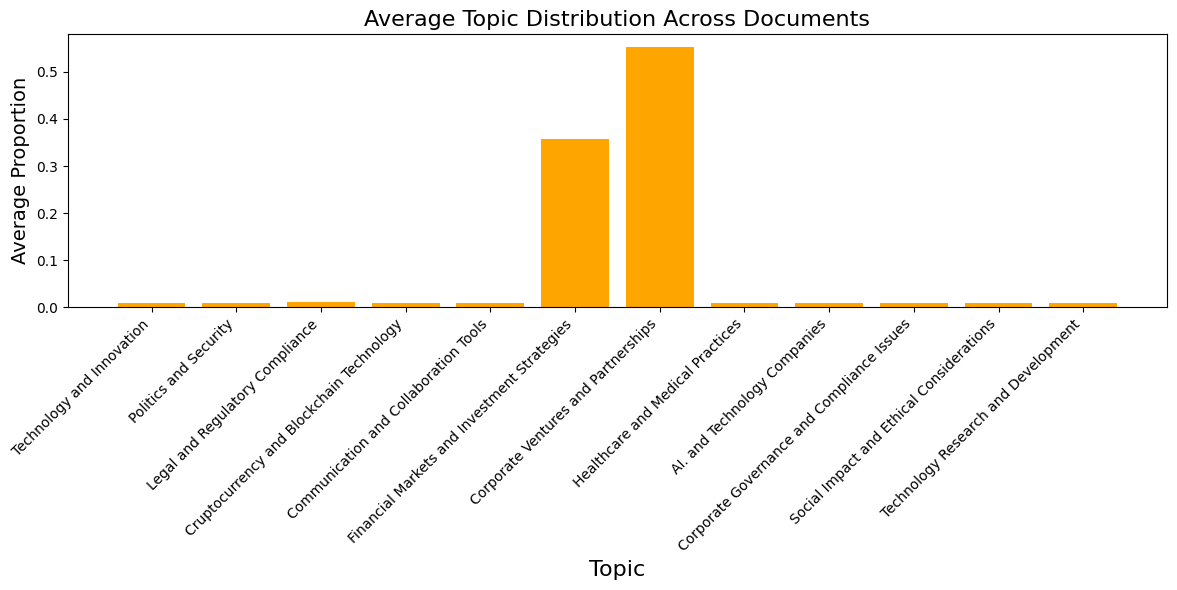

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get topic distribution for each document
topic_distribution = lda_model.transform(csr_matrix(pd.read_csv('vectorized_tfidf_500.csv').values))

# Calculate the average topic distribution across all documents
average_topic_distribution = topic_distribution.mean(axis=0)

# Define topic names
topic_names = [
    "Technology and Innovation",
    "Politics and Security",
    "Legal and Regulatory Compliance",
    "Cruptocurrency and Blockchain Technology",
    "Communication and Collaboration Tools",
    "Financial Markets and Investment Strategies",
    "Corporate Ventures and Partnerships",
    "Healthcare and Medical Practices",
    "AI. and Technology Companies",
    "Corporate Governance and Compliance Issues",
    "Social Impact and Ethical Considerations",
    "Technology Research and Development",
]

# Plot the average topic distribution with topic names
plt.figure(figsize=(12, 6))
plt.bar(range(len(average_topic_distribution)), average_topic_distribution, color='orange')
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Average Proportion', fontsize=14)
plt.title('Average Topic Distribution Across Documents', fontsize=16)
plt.xticks(range(len(average_topic_distribution)), topic_names, rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [9]:
import pandas as pd

# Get feature names
feature_names = pd.read_csv('vectorized_tfidf_500.csv').columns

# Number of top words per topic to display
n_top_words = 20

# Extract the topics and their terms
topics = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    topics.append(f"Topic {topic_idx}")

# Create a dataframe to display the topics
df_topics = pd.DataFrame({
    'Topic': [f"Topic {i}" for i in range(num_topics)],
    'Terms per Topic': [" ".join([feature_names[i] for i in lda_model.components_[topic_idx].argsort()[:-n_top_words - 1:-1]]) for topic_idx in range(num_topics)]
})

# Display the dataframe
print(df_topics)


       Topic                                    Terms per Topic
0    Topic 0  buffett berkshire lasso chandrasekaran newton ...
1    Topic 1  francis chang guardian freelancer pope traffic...
2    Topic 2  fm arr pocket devin column danger dasgupta mon...
3    Topic 3  genz nasscom myntra clock lilly lamar phishing...
4    Topic 4  repair icahn drummond galaxy cosson alison yoh...
5    Topic 5  ai openai model company google image india sta...
6    Topic 6  company ai technology new year apple people ti...
7    Topic 7  tenen ernie farahany masimo cafemedia moskowit...
8    Topic 8  pi parekh zammitt suleyman dhupar irish zimmer...
9    Topic 9  agility jadoun wendy rathore sosso digit human...
10  Topic 10  parscale salle lensa reben rationalist hernand...
11  Topic 11  adtech ftc vr ar zomato wood farhadi ravinutal...


### Topic Modeling with BERT

In [ ]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Install required packages
install("sentence-transformers")
install("bertopic")
install("pandas")

In [ ]:
import os
import pandas as pd
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
import pickle

# TASK 1: Read the Clustered Data
def read_clustered_data(clustered_file_path, tokenized_data_path):
    # Load clustered data
    clustered_data = pd.read_csv(clustered_file_path)

    # Read tokenized data
    with open(tokenized_data_path, 'r') as file:
        tokenized_data = [line.strip().strip('"') for line in file.readlines()]

    # Map clusters to original text data
    merged_data = pd.concat([clustered_data, pd.DataFrame(tokenized_data, columns=['text'])], axis=1)

    # Group data by cluster label
    grouped_data = merged_data.groupby('Cluster')

    # Iterate over groups and access member stories
    for cluster_label, cluster_group in grouped_data:
        # Ensure cluster label is an integer
        cluster_label = int(cluster_label)
        
        # Save clustered stories to individual files
        cluster_file_name = f"cluster_{cluster_label}.txt"
        cluster_group['text'].to_csv(cluster_file_name, index=False, header=False)
        
        # Print number of stories saved
        num_stories = cluster_group.shape[0]
        print(f"{num_stories} stories saved to {cluster_file_name}")

# TASK 2: Perform the Documents by Topics:
def perform_topic_modeling(cluster_directory):
    # Load a pre-trained BERT model from sentence-transformers
    model = SentenceTransformer('bert-base-nli-mean-tokens')
    
    # Dictionary to store documents and embeddings by cluster
    clustered_data = {}

    # Read the cluster files and encode the documents
    for cluster_num in range(4):
        cluster_file = os.path.join(cluster_directory, f'cluster_{cluster_num}.txt')
        with open(cluster_file, 'r', encoding='utf-8') as file:
            documents = [line.strip() for line in file.readlines()]
            embeddings = model.encode(documents)
            clustered_data[f'cluster_{cluster_num}'] = (documents, embeddings)

    # Dictionary to store topic models and topics for each cluster
    topics_per_cluster = {}

    # Perform topic modeling on the documents and embeddings for each cluster
    for cluster_label, (documents, embeddings) in clustered_data.items():
        topic_model = BERTopic()
        topics, probabilities = topic_model.fit_transform(documents, embeddings)
        topics_per_cluster[cluster_label] = {
            'topic_model': topic_model,
            'topics': topics,
            'probabilities': probabilities
        }

    # Save the topic models and topics for all clusters
    with open('topics_per_cluster.pkl', 'wb') as f:
        pickle.dump(topics_per_cluster, f)

    print("Topic modeling completed for all clusters.")

# Example usage
clustered_file_path = 'clustered_BERT_500.csv'  # Update with your file path
tokenized_data_path = 'tokenizedFine_500.json'  # Update with your tokenized data file path
cluster_directory = '.'  # Directory where the cluster files will be saved

read_clustered_data(clustered_file_path, tokenized_data_path)
perform_topic_modeling(cluster_directory)

##### Showcase the Topic Models

In [ ]:
def display_topics(topics_per_cluster):
    for cluster_label, data in topics_per_cluster.items():
        topic_model = data['topic_model']
        topics = topic_model.get_topics()
        print(f"\nTopics for {cluster_label}:")
        for topic_num, topic in topics.items():
            print(f"Topic {topic_num}: {topic[:10]}")  # Print top 10 words for each topic

In [ ]:
import pickle

def load_topic_models(file_path):
    with open(file_path, 'rb') as f:
        topics_per_cluster = pickle.load(f)
    return topics_per_cluster

# Load the topic models
file_path = 'topics_per_cluster.pkl'
topics_per_cluster = load_topic_models(file_path)

# Print loaded topics_per_cluster to verify content
print(topics_per_cluster)


In [ ]:
def display_topics(topics_per_cluster):
    for cluster_label, data in topics_per_cluster.items():
        topic_model = data['topic_model']
        topics = topic_model.get_topics()
        print(f"\nTopics for {cluster_label}:")
        print(f"Number of topics: {len(topics)}")  # Print number of topics
        for topic_num, topic in topics.items():
            print(f"Topic {topic_num}: {topic[:10]}")  # Print top 10 words for each topic


In [ ]:
import matplotlib.pyplot as plt

def visualize_topics(topics_per_cluster):
    for cluster_label, data in topics_per_cluster.items():
        topic_model = data['topic_model']
        topics = data['topics']
        probabilities = data['probabilities']
        
        try:
            # Check topics and probabilities before visualization
            print(f"Cluster: {cluster_label}")
            print(f"Topics: {topics}")
            print(f"Probabilities: {probabilities}")
            
            # Visualize topics
            fig = topic_model.visualize_topics()
            plt.title(f"Topics for {cluster_label}")
            plt.show()
        except Exception as e:
            print(f"Error visualizing topics for {cluster_label}: {str(e)}")

# Assuming topics_per_cluster is already loaded from topics_per_cluster.pkl
visualize_topics(topics_per_cluster)


In [ ]:
import pickle

# Function to load the topic models from the pickle file
def load_topic_models(file_path):
    with open(file_path, 'rb') as file:
        topics_per_cluster = pickle.load(file)
    return topics_per_cluster

# File path to the pickle file
file_path = 'topics_per_cluster.pkl'

# Load the topic models
try:
    topics_per_cluster = load_topic_models(file_path)
    print("Pickle file loaded successfully.")
    
    # Print the keys to verify the structure
    print("Keys in the loaded data:", topics_per_cluster.keys())
    
    # Example: Print some information from the loaded data
    for cluster_label, data in topics_per_cluster.items():
        print(f"Cluster: {cluster_label}")
        print(f"Number of topics: {len(data['topics'])}")
        print(f"Number of probabilities: {len(data['probabilities'])}")
        print(f"Example topics: {data['topics'][:10]}")
        print(f"Example probabilities: {data['probabilities'][:10]}")
        print()
    
except Exception as e:
    print(f"Error loading pickle file: {e}")

In [ ]:
def assign_documents_to_topics(topics_per_cluster):
    classified_documents = {}

    for cluster_label, data in topics_per_cluster.items():
        topics = data['topics']
        probabilities = data['probabilities']

        # Create a dictionary to store document classifications by topics
        classified_documents[cluster_label] = {f'topic_{topic}': [] for topic in set(topics)}

        # Iterate through documents and assign them to topics based on probabilities
        for doc_index in range(len(probabilities)):
            max_topic_idx = topics[doc_index]
            if max_topic_idx != -1:
                topic_key = f'topic_{max_topic_idx}'
                classified_documents[cluster_label][topic_key].append(doc_index)

    return classified_documents

# Example usage
classified_docs = assign_documents_to_topics(topics_per_cluster)

# Print the classified documents for each cluster
for cluster_label, topics_dict in classified_docs.items():
    print(f"Cluster: {cluster_label}")
    for topic_key, doc_indices in topics_dict.items():
        print(f"Topic {topic_key}: {len(doc_indices)} documents")

In [ ]:
def get_topic_keywords(topics_per_cluster):
    topic_keywords = {}

    for cluster_label, data in topics_per_cluster.items():
        topics = data['topics']
        topic_model = data['topic_model']  # Assuming you have access to the BERTopic object

        # Get topics with keywords from BERTopic
        topics_keywords = topic_model.get_topics()

        # Store topics and keywords
        topic_keywords[cluster_label] = {
            f'topic_{topic_num}': keywords[:10]  # Assuming you want to get top 10 keywords per topic
            for topic_num, keywords in topics_keywords.items() if topic_num in set(topics)
        }

    return topic_keywords

# Example usage
topic_keywords = get_topic_keywords(topics_per_cluster)

# Print or use topic_keywords dictionary as needed
for cluster_label, topics_data in topic_keywords.items():
    print(f"Cluster: {cluster_label}")
    for topic_key, keywords in topics_data.items():
        print(f"Topic {topic_key}: {keywords}")